<a href="Images_Digit_Classification_NN_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#Import Drive from Google Colab 

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 2.x

# Importing necessary library modules
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

from sklearn.metrics import classification_report, precision_score, f1_score, precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, auc, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset using h5 file

In [0]:
# Load SVHN dataset from a h5 file
# Open the file as readonly. 

h5f = h5py.File('/content/drive/My Drive/Dataset/SVHN_single_grey1.h5', 'r')

In [0]:
# Load the training, test and validation data
X_train=h5f['X_train'][:]
X_test=h5f['X_test'][:]
X_val=h5f['X_val'][:]
y_train=h5f['y_train'][:]
y_test=h5f['y_test'][:]
y_val=h5f['y_val'][:]

# Close this file
h5f.close()

In [88]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape    :", X_train.shape,"Data Type  : ", X_train.dtype)
print("Training data y-- Shape    :", y_train.shape,"       Data Type  : ", y_train.dtype)
print("Testing data X-- Shape     :", X_test.shape,"Data Type  : "  , X_test.dtype)
print("Testing data y-- Shape     :", y_test.shape,"       Data Type  : "  , y_test.dtype)
print("Validation data X-- Shape  :", X_val.shape,"Data Type  : ", X_val.dtype)
print("Validation data y-- Shape  :", y_val.shape,"       Data Type  : ", y_val.dtype)
print('\n')

Training data X-- Shape    : (42000, 32, 32) Data Type  :  float32
Training data y-- Shape    : (42000,)        Data Type  :  uint8
Testing data X-- Shape     : (18000, 32, 32) Data Type  :  float32
Testing data y-- Shape     : (18000,)        Data Type  :  uint8
Validation data X-- Shape  : (60000, 32, 32) Data Type  :  float32
Validation data y-- Shape  : (60000,)        Data Type  :  uint8




# Visualizing the dataset

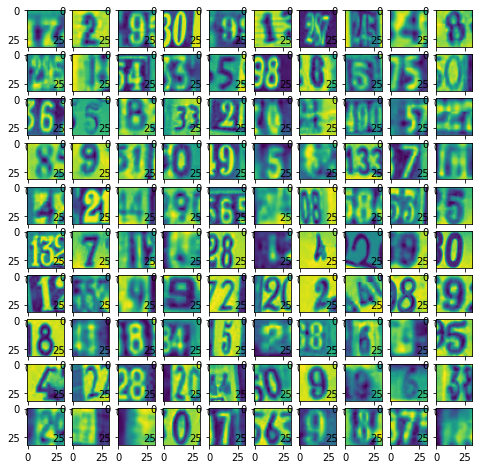

In [89]:
# Preparing plot to visualize data 

fig=plt.figure(figsize=(8, 8))

columns = 10
rows = 10

for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

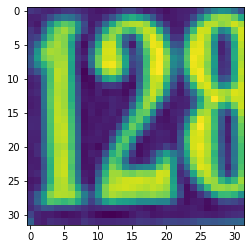

Label:  2


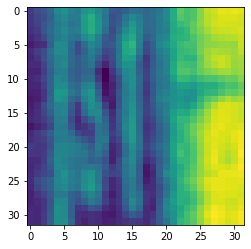

Label:  1


In [90]:
 #Show first image in the training set.

plt.imshow(X_train[0])   
plt.show()
print('Label: ', y_train[0])

#Show first image in the validation set.

plt.imshow(X_test[0])    
plt.show()
print('Label: ', y_test[0])

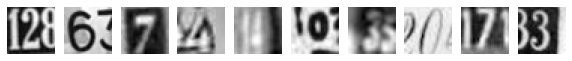

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [91]:
# visualizing the first 10 images in the dataset with labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# Implementing Classifier

In [92]:
# Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. 

X_train = X_train / 255
X_test = X_test / 255
X_val = X_val /255

print('\nTrain set:\n', X_train, '\n\nTest set:\n', X_test,'\n\nValidation set:\n',X_val)


Train set:
 [[[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
  [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
  [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
  ...
  [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
  [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
  [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]

 [[0.34101608 0.3414451  0.34656274 ... 0.3600055  0.35195178 0.3628635 ]
  [0.33995295 0.340829   0.34287727 ... 0.35580626 0.3419765  0.34730548]
  [0.33711922 0.33652744 0.33695647 ... 0.25044155 0.23458785 0.21521765]
  ...
  [0.35381806 0.35703844 0.3665243  ... 0.21707255 0.19051842 0.17276745]
  [0.35546157 0.3545251  0.35661566 ... 0.3069396  0.30391255 0.29125488]
  [0.34519058 0.34587333 0.3398859  ... 0.29498273 0.30054745 0.31092745]]

 [[0.48284313 0.49356118 0.47872823 ... 0.48460665 0.4867396  0.4835859 ]
  [0.4751

In [93]:
# Checking the proportion of each class in the target variable to ensure there is no imbalance for true values.

for i in range(0,10):
    print("Label: {0} | Value % = {1}".format( i, (y_train[y_train == i].size / y_train.size)*100) )

Label: 0 | Value % = 9.966666666666667
Label: 1 | Value % = 9.933333333333334
Label: 2 | Value % = 9.992857142857142
Label: 3 | Value % = 10.192857142857143
Label: 4 | Value % = 9.971428571428572
Label: 5 | Value % = 10.076190476190476
Label: 6 | Value % = 9.923809523809524
Label: 7 | Value % = 9.980952380952381
Label: 8 | Value % = 9.971428571428572
Label: 9 | Value % = 9.99047619047619


It is confirmed that the dataset is a balanced one.

In [94]:
print(X_train.shape,'\n', X_test.shape)

(42000, 32, 32) 
 (18000, 32, 32)


#Implementing Deep Neural Network

In [95]:
# Converting output label to multiple values

X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)
num_classes=10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [0]:
# Initializing the Artificial Neural Network Classifier
keras_model = Sequential()

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU

keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [98]:
keras_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_97 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_98 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_99 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 64)              

In [0]:
# Using sgd optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [100]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 155us/step - loss: 2.2848 - accuracy: 0.1455 - val_loss: 2.2557 - val_accuracy: 0.1929
Epoch 2/10
42000/42000 [==============================] - 6s 141us/step - loss: 2.2273 - accuracy: 0.2175 - val_loss: 2.1871 - val_accuracy: 0.2535
Epoch 3/10
42000/42000 [==============================] - 6s 141us/step - loss: 2.1420 - accuracy: 0.2656 - val_loss: 2.0934 - val_accuracy: 0.2914
Epoch 4/10
42000/42000 [==============================] - 6s 143us/step - loss: 2.0201 - accuracy: 0.3170 - val_loss: 1.9222 - val_accuracy: 0.3584
Epoch 5/10
42000/42000 [==============================] - 6s 142us/step - loss: 1.8840 - accuracy: 0.3588 - val_loss: 1.8535 - val_accuracy: 0.3453
Epoch 6/10
42000/42000 [==============================] - 6s 142us/step - loss: 1.7739 - accuracy: 0.3964 - val_loss: 1.7657 - val_accuracy: 0.3941
Epoch 7/10
42000/42000 [==============================] - 6s 1

In [0]:
# Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [102]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 164us/step - loss: 1.6533 - accuracy: 0.4520 - val_loss: 1.2671 - val_accuracy: 0.5870
Epoch 2/10
42000/42000 [==============================] - 7s 156us/step - loss: 1.2610 - accuracy: 0.5903 - val_loss: 1.1610 - val_accuracy: 0.6249
Epoch 3/10
42000/42000 [==============================] - 7s 158us/step - loss: 1.1502 - accuracy: 0.6313 - val_loss: 1.0625 - val_accuracy: 0.6651
Epoch 4/10
42000/42000 [==============================] - 7s 157us/step - loss: 1.0597 - accuracy: 0.6641 - val_loss: 0.9753 - val_accuracy: 0.6985
Epoch 5/10
42000/42000 [==============================] - 7s 159us/step - loss: 0.9584 - accuracy: 0.7002 - val_loss: 1.0095 - val_accuracy: 0.6793
Epoch 6/10
42000/42000 [==============================] - 7s 160us/step - loss: 0.9260 - accuracy: 0.7099 - val_loss: 0.9209 - val_accuracy: 0.7109
Epoch 7/10
42000/42000 [==============================] - 6s 1

- The accuracy of the model on val data increases to around 77% using adam or sgd optimiser

#Lets try to change the learning rate in SGD optimizer. Also, Increasing epoch because we will use small learning rate means mode will learn slow.

In [103]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 140us/step - loss: 0.6896 - accuracy: 0.7864 - val_loss: 0.6877 - val_accuracy: 0.7910
Epoch 2/100
42000/42000 [==============================] - 6s 141us/step - loss: 0.6500 - accuracy: 0.8011 - val_loss: 0.6694 - val_accuracy: 0.7973
Epoch 3/100
42000/42000 [==============================] - 6s 140us/step - loss: 0.6373 - accuracy: 0.8056 - val_loss: 0.6611 - val_accuracy: 0.8001
Epoch 4/100
42000/42000 [==============================] - 6s 139us/step - loss: 0.6305 - accuracy: 0.8072 - val_loss: 0.6560 - val_accuracy: 0.8015
Epoch 5/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.6260 - accuracy: 0.8084 - val_loss: 0.6524 - val_accuracy: 0.8027
Epoch 6/100
42000/42000 [==============================] - 6s 142us/step - loss: 0.6227 - accuracy: 0.8091 - val_loss: 0.6496 - val_accuracy: 0.8034
Epoch 7/100
42000/42000 [==============================]

- The accuracy of the model on val data using sgd with learning rate=0.0001 improved a bit(78% to 82%)

#Lets try to change the learning rate in ADAM optimizer. Also, Increasing epoch because we will use small learning rate means mode will learn slow.

In [104]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 6s 154us/step - loss: 0.5972 - accuracy: 0.8161 - val_loss: 0.6268 - val_accuracy: 0.8073
Epoch 2/100
42000/42000 [==============================] - 6s 151us/step - loss: 0.5879 - accuracy: 0.8195 - val_loss: 0.6094 - val_accuracy: 0.8163
Epoch 3/100
42000/42000 [==============================] - 6s 152us/step - loss: 0.5808 - accuracy: 0.8216 - val_loss: 0.6020 - val_accuracy: 0.8183
Epoch 4/100
42000/42000 [==============================] - 6s 152us/step - loss: 0.5693 - accuracy: 0.8258 - val_loss: 0.5964 - val_accuracy: 0.8201
Epoch 5/100
42000/42000 [==============================] - 6s 152us/step - loss: 0.5621 - accuracy: 0.8269 - val_loss: 0.5840 - val_accuracy: 0.8244
Epoch 6/100
42000/42000 [==============================] - 6s 153us/step - loss: 0.5573 - accuracy: 0.8302 - val_loss: 0.5838 - val_accuracy: 0.8239
Epoch 7/100
42000/42000 [==============================]

- The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [105]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 4s 64us/step
Val_acc using simple NN adam :  0.9115166664123535


In [106]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.911517


#Implementing batch normalization for training the neural network

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

#Adding Batch normalization layer

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [109]:
keras_model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_103 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_104 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 128)             

Using ADAM optimizer.

1.   learning rate= 0.0001



In [0]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [111]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 198us/step - loss: 2.1260 - accuracy: 0.2448 - val_loss: 2.0743 - val_accuracy: 0.2448
Epoch 2/100
42000/42000 [==============================] - 7s 177us/step - loss: 1.5816 - accuracy: 0.5103 - val_loss: 1.5760 - val_accuracy: 0.5170
Epoch 3/100
42000/42000 [==============================] - 8s 180us/step - loss: 1.2966 - accuracy: 0.6384 - val_loss: 1.3523 - val_accuracy: 0.6130
Epoch 4/100
42000/42000 [==============================] - 7s 175us/step - loss: 1.1108 - accuracy: 0.6952 - val_loss: 1.1830 - val_accuracy: 0.6564
Epoch 5/100
42000/42000 [==============================] - 7s 178us/step - loss: 0.9784 - accuracy: 0.7280 - val_loss: 1.1416 - val_accuracy: 0.6753
Epoch 6/100
42000/42000 [==============================] - 8s 179us/step - loss: 0.8762 - accuracy: 0.7562 - val_loss: 1.0940 - val_accuracy: 0.6714
Epoch 7/100
42000/42000 [==============================]

In [112]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 5s 77us/step
Val_acc using Batch ANN adam :  0.7992166876792908


In [113]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.911517
2,Batch_adam,0.799217


#Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [0]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [116]:
keras_model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_109 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_110 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 128)             

Using SGD optimizer

*   -learning rate =0.0001



In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [118]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 8s 194us/step - loss: 2.1646 - accuracy: 0.2439 - val_loss: 2.0961 - val_accuracy: 0.2841
Epoch 2/100
42000/42000 [==============================] - 7s 178us/step - loss: 1.6303 - accuracy: 0.4935 - val_loss: 1.6604 - val_accuracy: 0.4854
Epoch 3/100
42000/42000 [==============================] - 8s 181us/step - loss: 1.3243 - accuracy: 0.6255 - val_loss: 1.4054 - val_accuracy: 0.5875
Epoch 4/100
42000/42000 [==============================] - 8s 180us/step - loss: 1.1222 - accuracy: 0.6898 - val_loss: 1.2041 - val_accuracy: 0.6474
Epoch 5/100
42000/42000 [==============================] - 8s 181us/step - loss: 0.9779 - accuracy: 0.7279 - val_loss: 1.0982 - val_accuracy: 0.6836
Epoch 6/100
42000/42000 [==============================] - 8s 181us/step - loss: 0.8686 - accuracy: 0.7560 - val_loss: 1.0727 - val_accuracy: 0.6830
Epoch 7/100
42000/42000 [==============================]

In [119]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 4s 75us/step
Val_acc using BatchNorm sgd :  0.878083348274231


In [120]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Batch_SGD'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.911517
2,Batch_adam,0.799217
3,Batch_SGD,0.878083


- The batch normalization using SGD optimizer is giving better results than using adam optimizer.

#Implementing batch normalization and Dropout for training the neural network

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

#Adding BatchNormalization Layer and Dropout Layer (0.5)

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [123]:
keras_model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_115 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_116 (Activation)  (None, 256)             

Using ADAM optimizer.

*   learning rate= 0.0001


In [0]:
#Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [125]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 10s 230us/step - loss: 2.7578 - accuracy: 0.1010 - val_loss: 2.3049 - val_accuracy: 0.1125
Epoch 2/100
42000/42000 [==============================] - 9s 203us/step - loss: 2.6426 - accuracy: 0.1036 - val_loss: 2.2960 - val_accuracy: 0.1236
Epoch 3/100
42000/42000 [==============================] - 9s 205us/step - loss: 2.5637 - accuracy: 0.1032 - val_loss: 2.2959 - val_accuracy: 0.1241
Epoch 4/100
42000/42000 [==============================] - 9s 203us/step - loss: 2.5001 - accuracy: 0.1046 - val_loss: 2.2901 - val_accuracy: 0.1415
Epoch 5/100
42000/42000 [==============================] - 9s 206us/step - loss: 2.4543 - accuracy: 0.1027 - val_loss: 2.2897 - val_accuracy: 0.1468
Epoch 6/100
42000/42000 [==============================] - 9s 205us/step - loss: 2.4126 - accuracy: 0.1060 - val_loss: 2.2894 - val_accuracy: 0.1425
Epoch 7/100
42000/42000 [==============================

#Testing NN on test data

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [128]:
keras_model_final.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_121 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_123 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_122 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 128)             

In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [130]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 163us/step - loss: 2.1055 - accuracy: 0.2732 - val_loss: 2.0731 - val_accuracy: 0.2792
Epoch 2/100
42000/42000 [==============================] - 6s 140us/step - loss: 1.5799 - accuracy: 0.5128 - val_loss: 1.6609 - val_accuracy: 0.4673
Epoch 3/100
42000/42000 [==============================] - 6s 142us/step - loss: 1.2817 - accuracy: 0.6418 - val_loss: 1.3969 - val_accuracy: 0.5772
Epoch 4/100
42000/42000 [==============================] - 6s 140us/step - loss: 1.0874 - accuracy: 0.7021 - val_loss: 1.1904 - val_accuracy: 0.6543
Epoch 5/100
42000/42000 [==============================] - 6s 140us/step - loss: 0.9474 - accuracy: 0.7380 - val_loss: 1.2260 - val_accuracy: 0.6240
Epoch 6/100
42000/42000 [==============================] - 6s 140us/step - loss: 0.8475 - accuracy: 0.7621 - val_loss: 1.1095 - val_accuracy: 0.6582
Epoch 7/100
42000/42000 [==============================]

In [131]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy result : ', results_final[1])

18000/18000 [==============================] - 1s 73us/step
Test accuracy result :  0.7275000214576721


#Predicting the digits using NN classifier on test data

*   Image 1



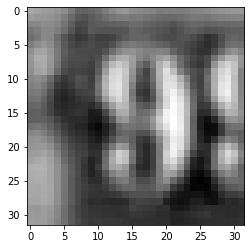

In [132]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [133]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[5]

9

In [134]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 5s 78us/step
Val_acc using BatchNorm and Dropout adam :  0.7804499864578247


In [135]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.911517
2,Batch_adam,0.799217
3,Batch_SGD,0.878083
4,Batch_Drop_adam,0.780450


*   Image 2



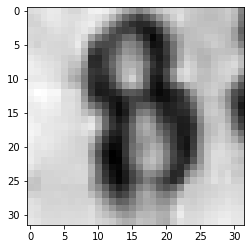

In [136]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

In [137]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[10]

8

- Image 3

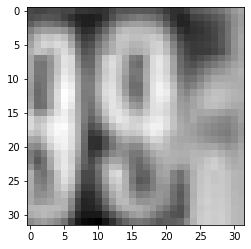

In [138]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')

In [139]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[112]

9

In [140]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[0 7 2 ... 7 9 2]


#Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics 

*   The normal NN gave an accuracy of around 91% and then with Hyper Parameter Tuning , we observed that the accuracy score started to reduce.
*   Using NN with BatchNormalization we got around 78% accuracy. We have predicted the classification of the images correctly.